# **Analyse des données DVF**
## Introduction
Ce notebook a été fait par Théo JAOUDET.
Il présente des analyses sur les demandes de valeurs foncières de l'année 2021 et établit quelques comparaisons avec l'année 2020.

Le plan de ce notebook est le suivant:

* Introduction

* Chargement et nettoyage des données

* Visualisation et interprétations de quelques statistiques générales de 2020

* Etude de cas: La ville de Courbevoie

* Critique sur notre travail et conclusion

**Attention, si jamais il est nécéssaire de recharger le notebook,il faudra attendre quelques minutes lors de l'éxécution car les données sont directement téléchargées depuis internet, et celle-ci sont volumineuses.**

### Chargement et nettoyage des données

In [1]:
import pandas as pd

df20 = pd.read_csv('valeursfoncieres-2020.txt',sep = '|')
df = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/817204ac-2202-4b4a-98e7-4184d154d98c',sep = '|')
#df = pd.read_csv('https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/',sep='|')
df = df.dropna (axis = 1, how = 'all')
pourcentages_null_2021 = df.isnull().sum()*100/len(df)
colonnes_supp_2021 = list(pourcentages_null_2021[pourcentages_null_2021 > 80].index)
df = df.drop(colonnes_supp_2021, axis = 1)
del df['No disposition']
del df['No voie']
del df['Type de voie']
del df['Code voie']
del df['Voie']
del df['Code postal']
del df['Section']
del df['No plan']
del df['Nombre de lots']
del df['Code type local']
del df['Nature culture']
del df['1er lot']
df20 = df20.dropna (axis = 1, how = 'all')
pourcentages_null_2021 = df20.isnull().sum()*100/len(df20)
colonnes_supp_2021 = list(pourcentages_null_2021[pourcentages_null_2021 > 80].index)
df20 = df20.drop(colonnes_supp_2021, axis = 1)
del df20['No disposition']
del df20['No voie']
del df20['Type de voie']
del df20['Code voie']
del df20['Voie']
del df20['Code postal']
del df20['Section']
del df20['No plan']
del df20['Nombre de lots']
del df20['Code type local']
del df20['Nature culture']
del df20['1er lot']

C:\Users\theoj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\theoj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,23,24,25,26,27,28,29,30,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Les données des années 2020 et 2021 ont été importées, puis directement nettoyés selon plusieurs critères:
* Lignes et colonnes nulles
* Lignes et colonnes nulles à plus de 80%
* Colonnes inutilisées

### Optimisation de colonnes

In [2]:
df['Valeur fonciere']=df['Valeur fonciere'].apply(lambda x:float(str(x).replace(',','.')))
df['Surface reelle bati']=df['Surface reelle bati'].apply(lambda x:float(str(x).replace(',','.')))#converti en float
df["Prix m2"] = df['Valeur fonciere']/df['Surface reelle bati']
df['Prix m2']=df['Prix m2'].apply(lambda x:float(str(x).replace(',','.')))
df20['Valeur fonciere']=df20['Valeur fonciere'].apply(lambda x:float(str(x).replace(',','.')))
df20['Surface reelle bati']=df20['Surface reelle bati'].apply(lambda x:float(str(x).replace(',','.')))#converti en float
df20["Prix m2"] = df20['Valeur fonciere']/df20['Surface reelle bati']
df20['Prix m2']=df20['Prix m2'].apply(lambda x:float(str(x).replace(',','.')))
df

,Date mutation,Nature mutation,Valeur fonciere,Commune,Code departement,Code commune,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Prix m2
0,05/01/2021,Vente,185000.0,VAL-REVERMONT,1,426,Maison,97.0,5.0,2410.0,1.907216e+03
1,05/01/2021,Vente,185000.0,VAL-REVERMONT,1,426,Dépendance,0.0,0.0,2410.0,inf
2,06/01/2021,Vente,10.0,BEY,1,42,NaN,NaN,NaN,530.0,NaN
3,04/01/2021,Vente,204332.0,BUELLAS,1,65,Maison,88.0,4.0,866.0,2.321955e+03
4,06/01/2021,Vente,320000.0,MONTAGNAT,1,254,Maison,168.0,5.0,1426.0,1.904762e+03
...,...,...,...,...,...,...,...,...,...,...,...
3379227,12/03/2021,Vente,383000.0,PARIS 04,75,104,Appartement,30.0,2.0,NaN,1.276667e+04
3379228,17/03/2021,Vente,260000.0,PARIS 02,75,102,Appartement,37.0,2.0,NaN,7.027027e+03
3379229,19/03/2021,Vente,38000.0,PARIS 04,75,104,Dépendance,0.0,0.0,NaN,inf
3379230,30/03/2021,Vente,38000.0,PARIS 04,75,104,Dépendance,0.0,0.0,NaN,inf


Passage des colonnes valeur fonciere et surface reelle bati en float, et création de la colonne Prix m2, pour les années 2020 et 2021. 

### Nombres de mutation selon leur nautre en 2021

In [3]:
nombreMutation20=df.filter(items=["Nature mutation","Date mutation"])
nombreMutation20.columns=["Nature mutation","Nombre total"]
nombreMutation20.groupby(by="Nature mutation").count()

,Nombre total
Nature mutation,
Adjudication,5941
Echange,31564
Expropriation,2680
Vente,3136416
Vente en l'état futur d'achèvement,193014
Vente terrain à bâtir,9617


On remarque que les mutations les plus élevées sont largements les ventes, suivit plus loin par les vente en l'état futur d'achèvement.

### Nombres de mutation par commune en 2021

In [4]:
nombreMutationVille20=df.filter(items=["Nature mutation","Commune"])
nombreMutationVille20.groupby(by="Commune").count().sort_values(by=["Nature mutation"],ascending=False)

,Nature mutation
Commune,
NICE,23009
NANTES,18479
BESANCON,16515
BORDEAUX,14998
TOULOUSE,13383
...,...
FENOUILLET DU RAZES,1
CASTERAS,1
AVOSNES,1


La ville la plus dynamique toutes muations confondues est Nice avec plus de 23 000 mutations. Ville côtière très attractive, cela est tout à fait compréhensible. Les villes suivantes sont égalemetn des villes attractives mais pour d'autres raisons. On peut noter qu'il ny a aucune ville d'Ile-de-France.

### Moyenne de la valeur foncière selon le type de local en 2021

In [5]:
donnee2020_ValFoncBien=df.filter(items=["Type local","Valeur fonciere","Nature mutation"])
donnee2020_ValFoncBien=donnee2020_ValFoncBien[donnee2020_ValFoncBien["Nature mutation"]=="Vente"][["Type local","Valeur fonciere"]]
donnee2020_ValFoncBien=donnee2020_ValFoncBien.groupby(by=["Type local"]).mean("Valeur fonciere").sort_values(by=["Valeur fonciere"])
donnee2020_ValFoncBien

,Valeur fonciere
Type local,
Maison,8.090294e+05
Local industriel. commercial ou assimilé,1.990127e+06
Dépendance,3.769373e+06
Appartement,5.213673e+06


Ce tableau est plutôt surprenant car les appartements, qui sont en général plus petis, sont ceux avec la moyenne la plus élevée, alors qu'on pourrait s'attendre à voir les locaux industriels et même les maisons au-dessus. Cela peut être dû à des problèmes dans la data. 

### Nombres d'appartements vendus à Paris en 2021

Text(0.5, 1.0, "Histogramme du nombre de vente d'appartments dans Paris par arrondissement")

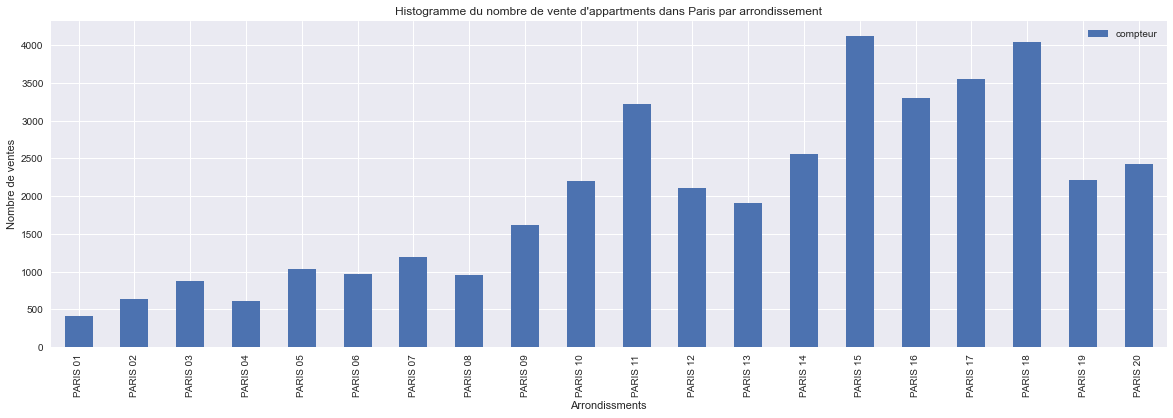

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df['compteur']=1
df[(df['Type local']=='Appartement' )& (df['Code departement']==75 )& (df['Nature mutation']=='Vente')].groupby('Commune').sum().plot(y='compteur',kind='bar',figsize=(20,6))
plt.ylabel('Nombre de ventes')
plt.xlabel('Arrondissments')
plt.title("Histogramme du nombre de vente d'appartments dans Paris par arrondissement")

On peut voir que plus on s'écarte du centre de Paris, et plus le nombre de ventes est élevée, excpté quelques arrondissemts spéciaux comme le 16, 19 et 20 ème. En effet, le 11, 19 et 20 se situant au nord-est de Paris ne sont pas très attractifs de part la réputation de la zone, tanids que dans le 16 ème les hauts coûts empêchent les transactions. Le 15 et 18 ème, respectivement au sud et nord de Paris, mais côté ouest, enregistres les meilleurs ventes. Cela a est du à des oût plus abordables, tout en restant dans des zones plutôt sûres. 

### Prix du m2 par arrondissment parisien en 2021

Text(0.5, 1.0, 'Prix du m2 par arrondissment parisien')

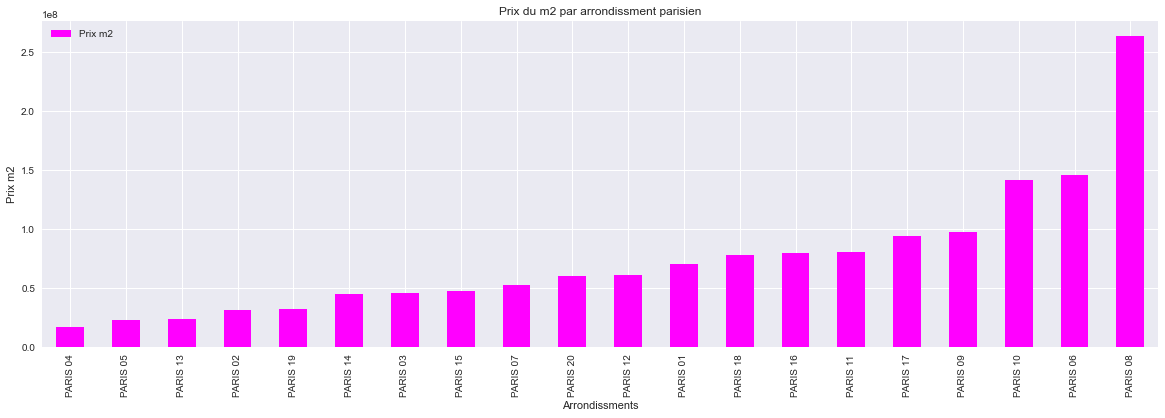

In [7]:
df20['compteur']=1
df20[(df20['Type local']=='Appartement' )& (df20['Code departement']==75 )].groupby('Commune').sum().sort_values(by=["Prix m2"],ascending=True).plot(y='Prix m2',kind='bar',color='magenta',figsize=(20,6))
plt.ylabel('Prix m2')
plt.xlabel('Arrondissments')
plt.title("Prix du m2 par arrondissment parisien")

Cet histogramme présentant le prix du mètre carré selon chaque arrondissment de Paris nous montre certaines évidences. En effet, le quartier le plus cher, le 8ème arrondissment, est celui où se trouvent les Champs Elysées ainsi que l'Arc de Triomphe ce qui explique ce prix, tout comme le 6ème avec le Louvre et le Jardin du Luxembourg. Ce qui étonnant est de voir le 10ème aussi haut, et surout le 7ème, quartier de la Tour Eiffel, aussi loin. 

### Nombres de mutation selon leur nautre en 2021

Text(0.5, 1.0, 'Histogramme du type de mutations')

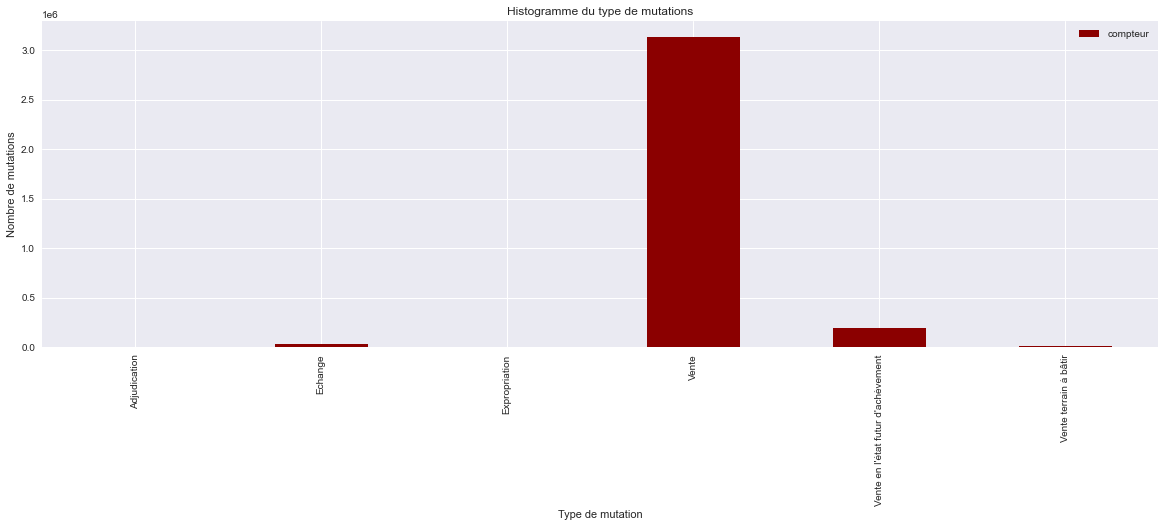

In [8]:
df['compteur']=1
df.groupby('Nature mutation').sum().plot(y='compteur',kind='bar',color='darkred',figsize=(20,6))
#df.groupby('Nature mutation').sum().plot(y='compteur',kind='bar')
plt.ylabel('Nombre de mutations')
plt.xlabel('Type de mutation')
plt.title("Histogramme du type de mutations")

### Moyenne de la valeur fonciere par mutation en 2021

Text(0.5, 1.0, 'Histogramme de la moyenne de la valeur fonciere par mutation')

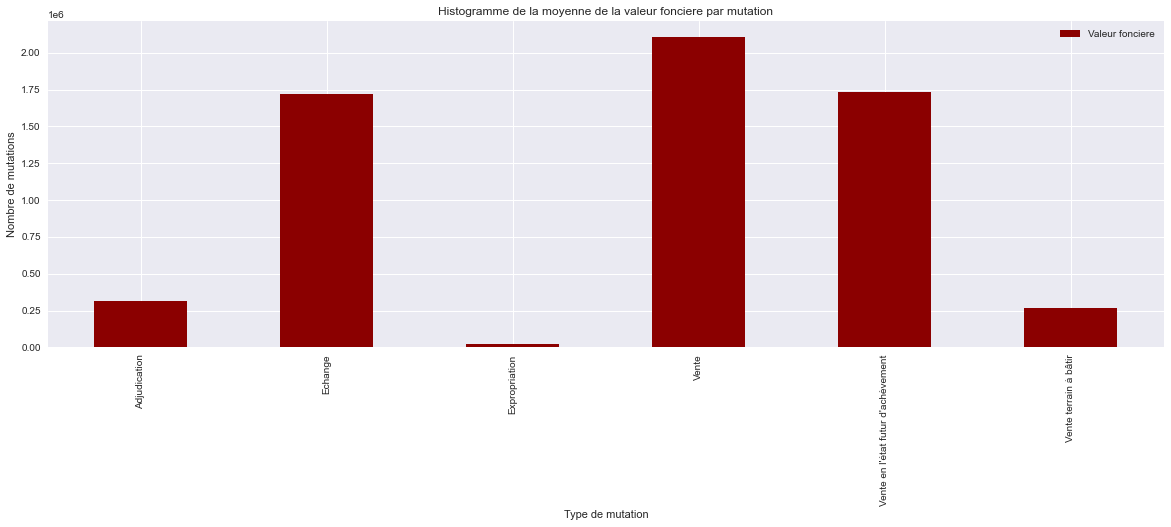

In [9]:
df['compteur']=1
df.groupby('Nature mutation').mean().plot(y='Valeur fonciere',kind='bar',color='darkred',figsize=(20,6))
plt.ylabel('Nombre de mutations')
plt.xlabel('Type de mutation')
plt.title("Histogramme de la moyenne de la valeur fonciere par mutation")

Ces deux histogrammes nous montrent que bien que le nombre de ventes est extrèmement plus élevé que tous les autres types, l'écart concernant la moyenne des valeurs foncières est bien moins élevé. Les échanges sont presque équuivalents aux ventes, signe qu'ils ont en général des biens bien plus onéreux avec les ventes par rapport aux autres mutations. il y a donc peu d'échange, mais avec de grosses valeurs foncieres. 

### Nuage de points de la surface réelle bati selon la valeur fonciere en 2021

Text(0.5, 1.0, 'Nuage de points de la surface réelle bati')

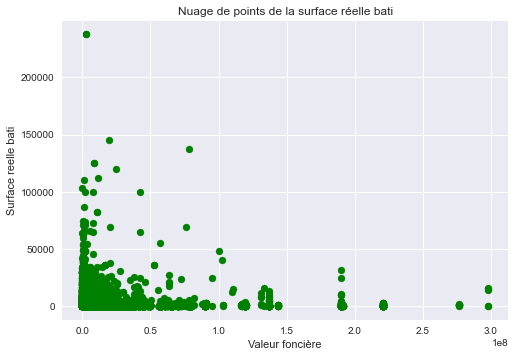

In [10]:
x=df['Valeur fonciere']
y=df['Surface reelle bati']
plt.scatter(x, y, color="green")
plt.xlabel('Valeur foncière')
plt.ylabel('Surface reelle bati')
plt.title("Nuage de points de la surface réelle bati")

Un nuage de points logique pour ces deux données devrait respecter une droite affine y=ax, car plus la surface est grande et plus la valeur est grande. Cependant, si les données sont de la sorte, c'est parce que d'autres facteurs entrent en jeu, comme le lieu et le type de batiment. On peut également supprimer les valeurs illogiques qui sont sur les extremités hautes et droites du graphique. Finalment, on en conclu qu'une plus grande surface n'entraine pas forcément une plus grande valeur foncière, et inversement.

### Box plot de la surface reelle bati des maisons à Paris en 2021

C:\Users\theoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot de la surface reelle bati')

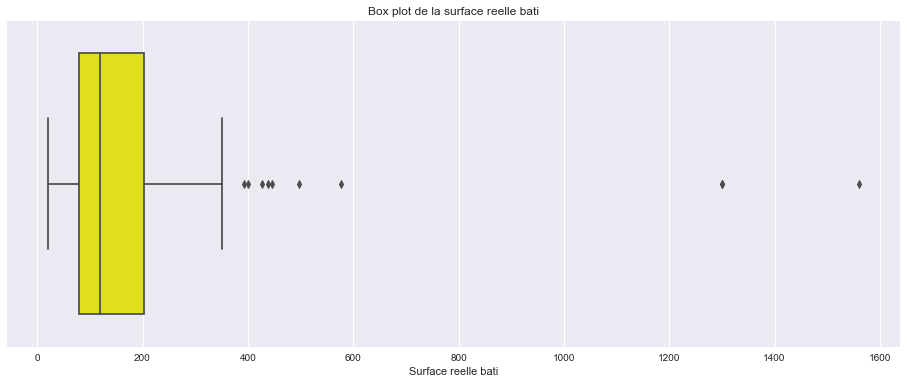

In [11]:
import seaborn as sns
dfBox = df[(df['Type local']=='Maison' )& (df['Code departement']==75 )]
plt.figure(figsize=(16, 6))
sns.boxplot(dfBox['Surface reelle bati'],color='yellow')
plt.xlabel('Surface reelle bati')
plt.title("Box plot de la surface reelle bati")

A Paris, les surfaces réelles batis en maison vont de 5m^2 à 350m^2, mais la très grande majorité est regroupé autour de 120m^2, qui est la médiane. On note une dizaines de valeurs extrêmes.

### Box plot de la surface reelle bati des appartements à Paris en 2021

C:\Users\theoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot de la surface réelle bati')

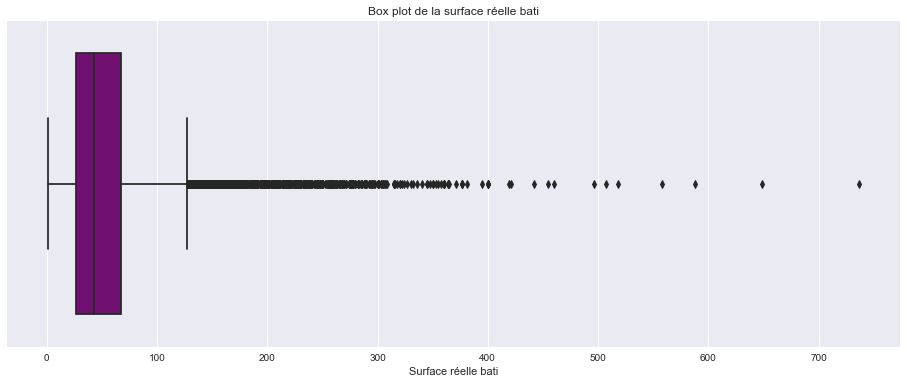

In [12]:
dfBox = df[(df['Type local']=='Appartement' )& (df['Code departement']==75 )]
plt.figure(figsize=(16, 6))
sns.boxplot(dfBox['Surface reelle bati'],color='purple')
plt.xlabel('Surface réelle bati')
plt.title("Box plot de la surface réelle bati")

A Paris, les surfaces réelles batis en appartement vont de 0m^2 à 125m^2, mais la très grande majorité est regroupé autour de 40m^2, qui est la médiane. On note beaucoup de valeurs extrêmes, ce qui montre la présence de nombreux immeubles, ou d'erreurs dans la data. Logiquement, la répartition des valeurs de ce boxplot est plus faible que celle du box plot précedent. 

### Nombre de pieces par bâtiment en 2021

Text(0.5, 1.0, 'Nombre de pieces par local')

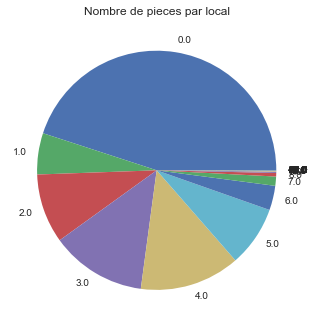

In [13]:
df['compteur'] = 1
dpp =  df.groupby("Nombre pieces principales").sum().compteur
dpp = dpp.to_frame().reset_index()
plt.pie(dpp['compteur'], labels=dpp['Nombre pieces principales']) 
plt.title("Nombre de pieces par local")

Près de la moitié des pièce sont à 0, signe d'erreur. Il faut donc étudier une data propre.

### Nombre de pieces par bâtiment nettoyé en 2021

Text(0.5, 1.0, 'Nombre de pieces par local sans prendre en compte les 0 et >9 pièces')

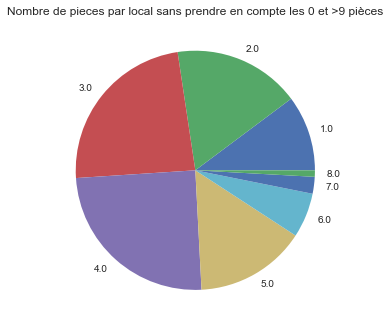

In [14]:
df['compteur'] = 1
dpp =  df[(df['Nombre pieces principales']!=0) & (df['Nombre pieces principales']<9)].groupby("Nombre pieces principales").sum().compteur
dpp = dpp.to_frame().reset_index()
plt.pie(dpp['compteur'], labels=dpp['Nombre pieces principales']) 
plt.title("Nombre de pieces par local sans prendre en compte les 0 et >9 pièces")

Ce nouveau diagramme ciculaire, nettoyé des locaux avec 0 pièce et 9 pieces et plus, nous montre une répartition plus claire du nombre de pièces. On remarque que près de la moitié des locaux possèdent 3 ou 4 pièces, puis viennet les locaux à 2 et 5 pièces, suivient par ceux à 1 pièce. Enfin, à partir de 7 pièces le resultat devient très minime. 

### Types de locaux en 2020

Text(0.5, 1.0, 'Types de locaux en 2020')

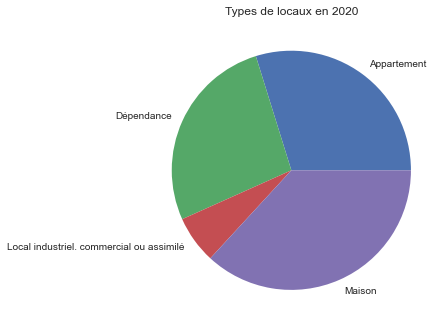

In [15]:
df20['compteur'] = 1
dpp20 =  df20.groupby("Type local").sum().compteur
dpp20 = dpp20.to_frame().reset_index()
plt.pie(dpp20['compteur'], labels=dpp20['Type local']) 
plt.title("Types de locaux en 2020")

### Types de locaux en 2021

Text(0.5, 1.0, 'Types de maisons en 2021')

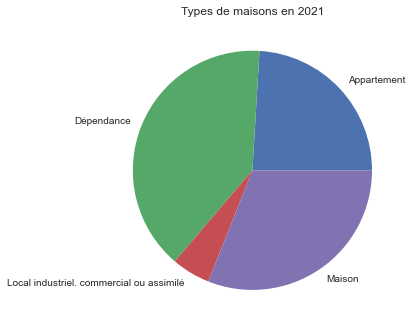

In [16]:
df['compteur'] = 1
dpp =  df.groupby("Type local").sum().compteur
dpp = dpp.to_frame().reset_index()
plt.pie(dpp['compteur'], labels=dpp['Type local']) 
plt.title("Types de maisons en 2021")

Ces deux diagrammes ciculaires, montrant la répartition des types de biens vendus en 2020 et 2021, a plusieurs significations. On remarque qu'en 2020, les maisons et appartement se répartisenet équitablement 2 tiers des ventes en France. Ce pourcentage descend à près de 50% en 2021. On peut noter que cette baisse a vu une très belle montée des dépendances. Ce phenomène peut être du à la volonté des français d'avoir un petit lieu hors de chez eux pour venir se reposer, dû potentiellement au confinement durant le covid, après quoi les français voulaient avoir un coin pour changer d'air, mais toujours chez eux. 

### Nombres d'appartements vendus dans le 92 en 2021

Text(0.5, 1.0, 'Histogramme du nombre de ventes dans le 92')

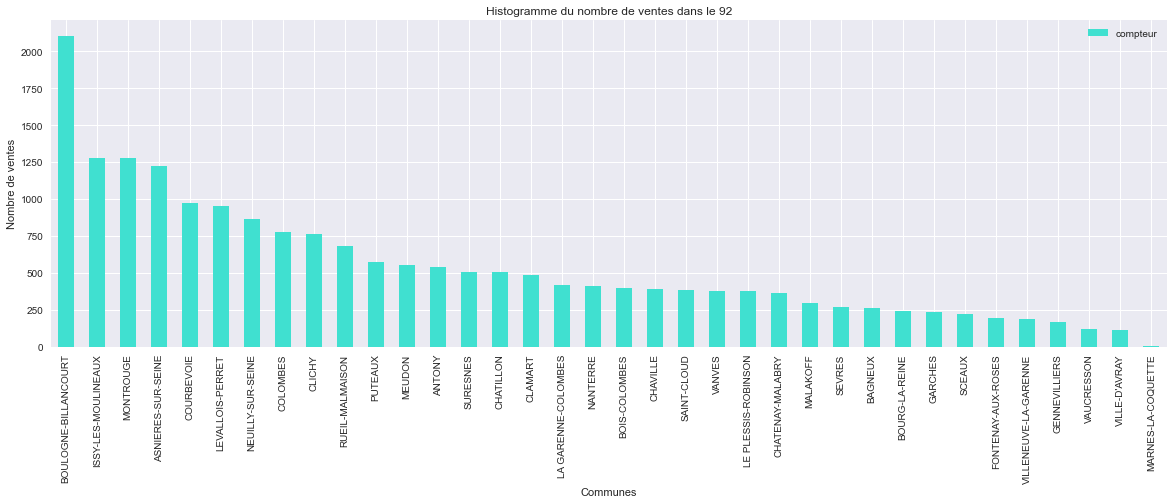

In [17]:
df['compteur']=1
df[(df['Type local']=='Appartement' )& (df['Code departement']==92 )& (df['Nature mutation']=='Vente')].groupby('Commune').sum().sort_values(by=["compteur"],ascending=False).plot(y='compteur',kind='bar',color='turquoise',figsize=(20,6))
plt.ylabel('Nombre de ventes')
plt.xlabel('Communes')
plt.title("Histogramme du nombre de ventes dans le 92")

Selon ce graphique, Boulogne est la ville avec le plus de ventes. Sa proximité avec Paris combinée avec des coûts moins élevées font d'elle une ville très dynamque dans le 92. Les trois premières villes sont dans le sud, sud-ouest, signe de l'attractivité de cette zone. Puis viennent les villes au nord ouest. Cela montre que les ventes sont bien plus présentes dans les zones limitrophes de Paris.

### Histogramme du prix du m2 des appartements dans le 92 en 2021

Text(0.5, 1.0, 'Histogramme du prix du m2 dans le 92')

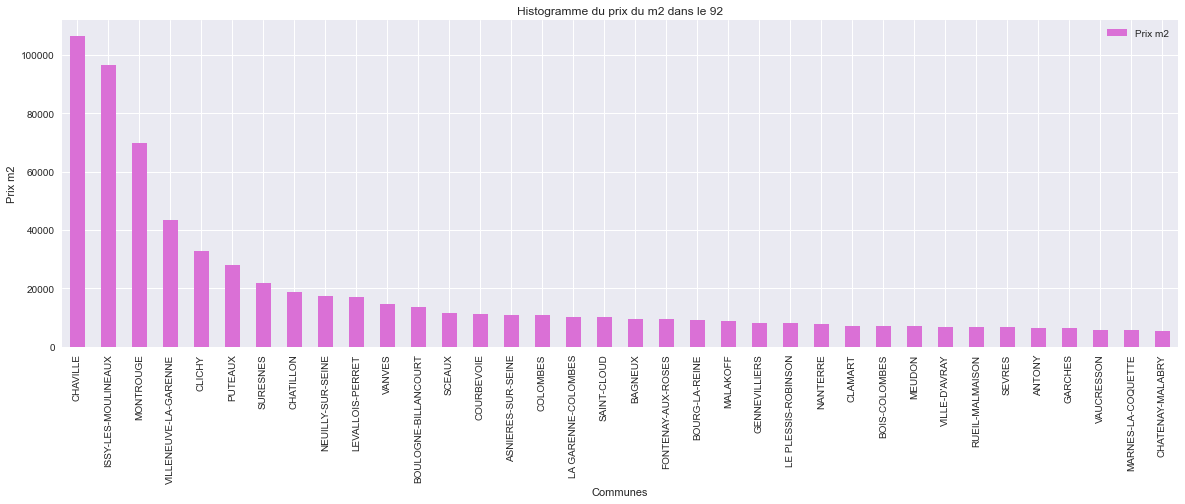

In [18]:
df[(df['Type local']=='Appartement' )& (df['Code departement']==92 )& (df['Nature mutation']=='Vente')].groupby('Commune').mean().sort_values(by=["Prix m2"],ascending=False).plot(y='Prix m2',kind='bar',color='orchid',figsize=(20,6))
plt.ylabel('Prix m2')
plt.xlabel('Communes')
plt.title("Histogramme du prix du m2 dans le 92")

Les prix du métre carré dans le 92 semblent être très largements dominés par Chaville puis Issy, ce qui est plutôt surprenant étant donné la réputation de ces villes, ainsi que la valeur du m2 qui est à plus de 100 000 euros.

### Histogramme nettoyé du prix du m2 des appartements dans le 92 en 2021

Text(0.5, 1.0, 'Histogramme du prix du m2 dans le 92 inférieur à 20 000 euros')

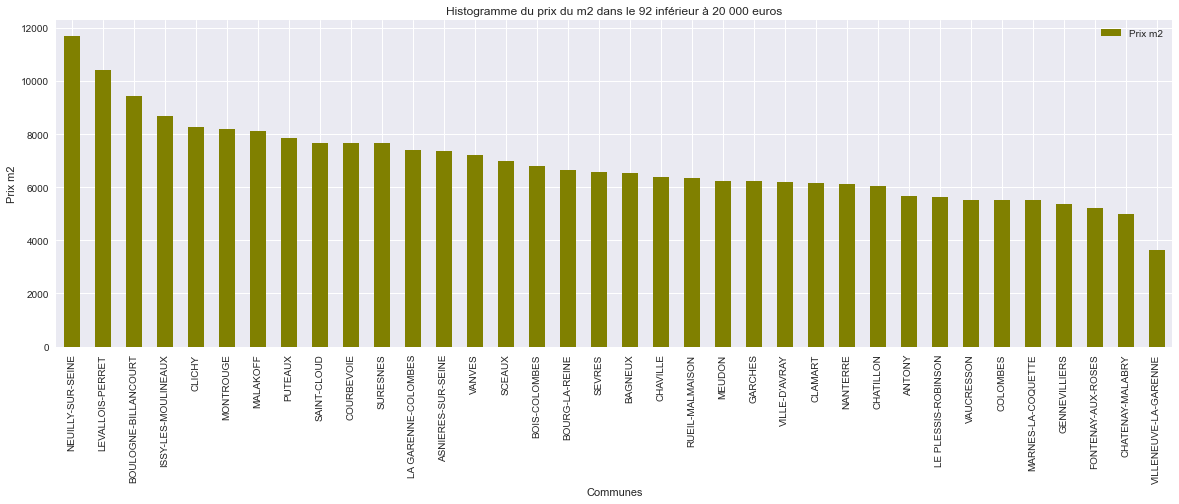

In [19]:
df[(df['Type local']=='Appartement' )& (df['Prix m2']<30000 )& (df['Code departement']==92 )& (df['Nature mutation']=='Vente')].groupby('Commune').mean().sort_values(by=["Prix m2"],ascending=False).plot(y='Prix m2',kind='bar',color='olive',figsize=(20,6))
plt.ylabel('Prix m2')
plt.xlabel('Communes')
plt.title("Histogramme du prix du m2 dans le 92 inférieur à 20 000 euros")

On retouve ci-dessus le graphique plus logique que le précédent. En effet, on retire toutes les villes dont le prix au mètre carré est inférieur à 30 000 euros. On a alors des données bien plus réalistes, avec Neuilly-sur-Seine en tête, suivi de Levallois, ce qui semble suivre la norme des prix réels. 

### Histogramme du prix du m2 des appartements en France en 2021

Text(0.5, 1.0, 'Histogramme du prix du m2 en France')

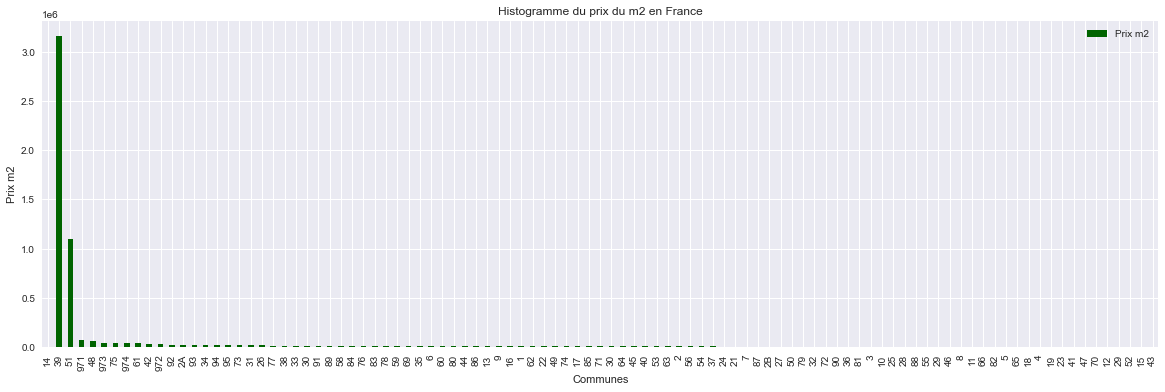

In [20]:
df[(df['Type local']=='Appartement' )& (df['Nature mutation']=='Vente')].groupby('Code departement').mean().sort_values(by=["Prix m2"],ascending=False).plot(y='Prix m2',kind='bar',color='darkgreen',figsize=(20,6))
plt.ylabel('Prix m2')
plt.xlabel('Communes')
plt.title("Histogramme du prix du m2 en France")

Les prix du métre carré en France semblent être très largements dominés par le 39 (Jura) puis le 51 (Marne), ce qui est plutôt surprenant étant donné la localité de ces régions, ainsi que la valeur du m2 qui est à plus de 100 000 euros.

### Histogramme nettoyé du prix du m2 des appartements en France en 2021

Text(0.5, 1.0, 'Histogramme du prix du m2 en France')

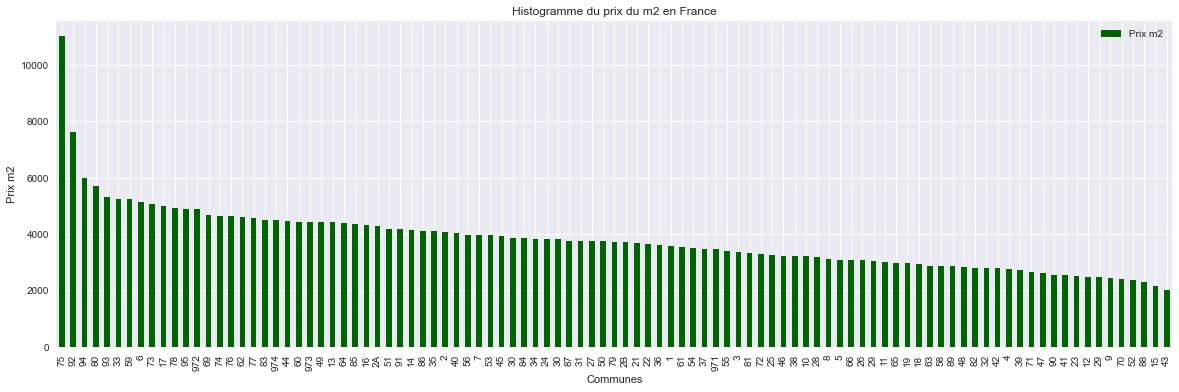

In [21]:
df[(df['Type local']=='Appartement' )& (df['Prix m2']<30000 )& (df['Prix m2']!=0 )& (df['Nature mutation']=='Vente')].groupby('Code departement').mean().sort_values(by=["Prix m2"],ascending=False).plot(y='Prix m2',kind='bar',color='darkgreen',figsize=(20,6))
plt.ylabel('Prix m2')
plt.xlabel('Communes')
plt.title("Histogramme du prix du m2 en France")

On retouve ci-dessus le graphique plus logique que le précédent. En effet, on retire toutes les villes dont le prix au mètre carré est inférieur à 30 000 euros. On a alors des données bien plus réalistes, avec Paris, suivi des Hauts-de-Seine, ce qui semble suivre la norme des prix réels. 

### Nombre de ventes par jours en France en 2020-2021

Text(0.5, 1.0, 'Nombre de ventes par jours')

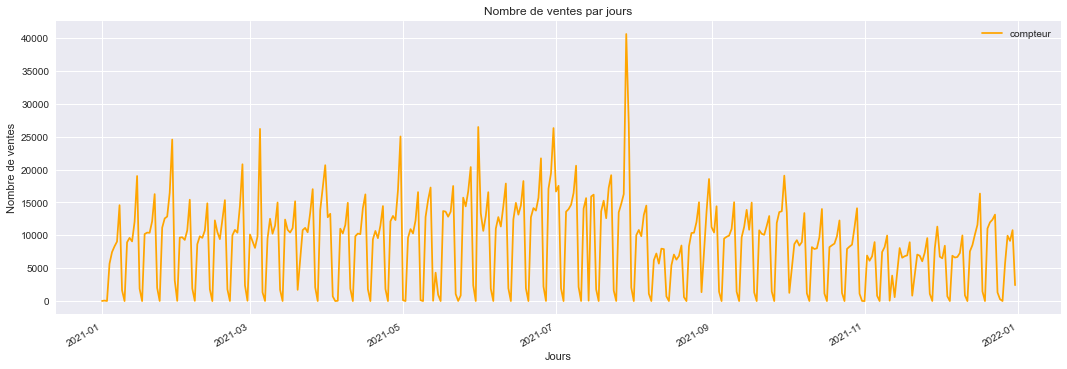

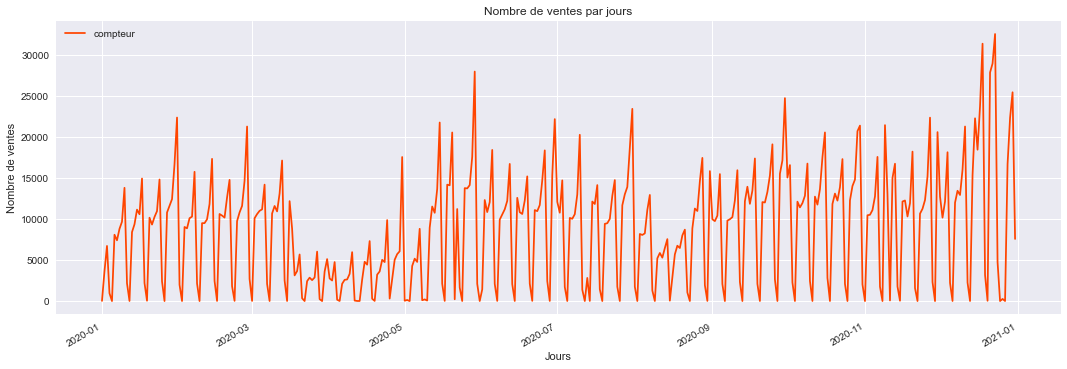

In [22]:
df['compteur']=1
df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y');
df20['compteur']=1
df20['Date mutation'] = pd.to_datetime(df20['Date mutation'], format='%d/%m/%Y');
df[(df['Nature mutation']=='Vente')].groupby('Date mutation').sum().sort_values(by=["Date mutation"],ascending=True).plot(y='compteur',kind='line',figsize=(18,6),color='orange')
plt.xlabel('Jours')
plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes par jours')
df20[(df20['Nature mutation']=='Vente')].groupby('Date mutation').sum().sort_values(by=["Date mutation"],ascending=True).plot(y='compteur',kind='line',figsize=(18,6),color='orangered')
plt.xlabel('Jours')
plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes par jours')

Ces deux graphiques nous montrent le nombre de ventes de batiments sur l'année 2020 et 2021. 
* On remarque qu'en *2020*, il y a deux creux en avril et fin août, et deux pics en juin et fin décembre. Cela est totalement dû aux deux confinements contre le COVID du 17 mars au 11 mai 2020, et du 30 octobre au 15 décembre. Les creux sont les confinements, et les pics les déconfinements. 
* Pour l'année *2021*, le marché est stable de janvier à août, avant d'avoir un pic fin août suivi d'un creux jusqu'à la fin de l'année.
L'année 2020 étant très spéciale, on ne peut pas comparer les deux graphiques entre eux, mais on peut remarquer que le nombre des ventes est extrèmement dépendant de la vie des français. 

### Nombre de ventes par jours en France selon le type en 2020-2021

Text(0.5, 0, 'Jours')

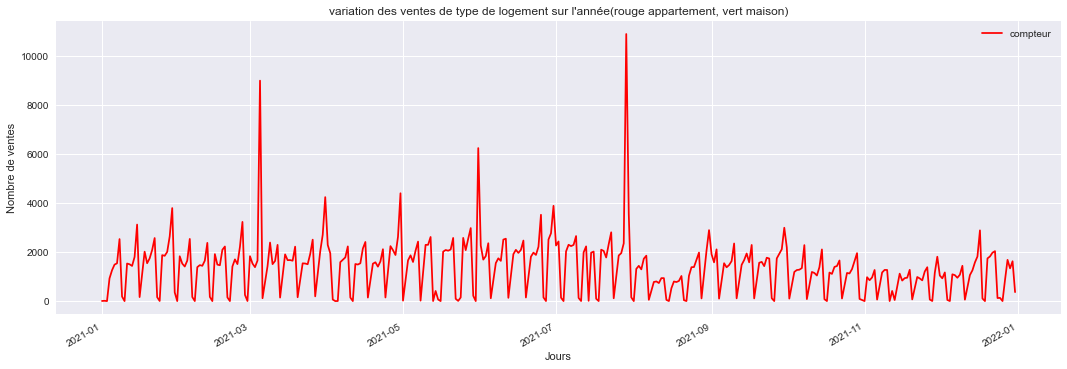

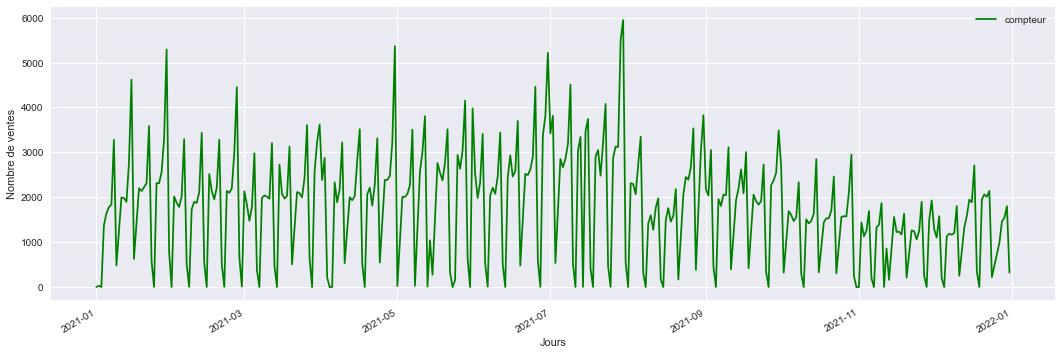

In [23]:
df['compteur']=1
df[(df['Nature mutation']=='Vente')&(df['Type local']=='Appartement')].groupby('Date mutation').sum().sort_values(by=["Date mutation"],ascending=True).plot(y='compteur',kind='line',figsize=(18,6),color='r')
plt.ylabel('Nombre de ventes')
plt.xlabel('Jours')
plt.title("variation des ventes de type de logement sur l'année(rouge appartement, vert maison)")
df[(df['Nature mutation']=='Vente')&(df['Type local']=='Maison')].groupby('Date mutation').sum().sort_values(by=["Date mutation"],ascending=True).plot(y='compteur',kind='line',figsize=(18,6),color='g')
plt.ylabel('Nombre de ventes')
plt.xlabel('Jours')

Ces deux graphiques nous montrent le nombre de ventes de batiments selon leur type (appartement ou maison) sur l'année 2021. 
Le marché des appartements est très stable tout au long de l'année, avec deux pics en mars et août 2021. Tandis que celui des maisons est bien plus instabes, avec des pics aléatoires. Cependant, on peut remarquer que les deux subissent le même pic en août avec par suite une baisse dans le dernier trimestre.  

### Surface reelle bati en fonction du nombre de pièces en France en 2021

Text(0.5, 1.0, 'Surface reelle bati en fonction du nombre de pièces')

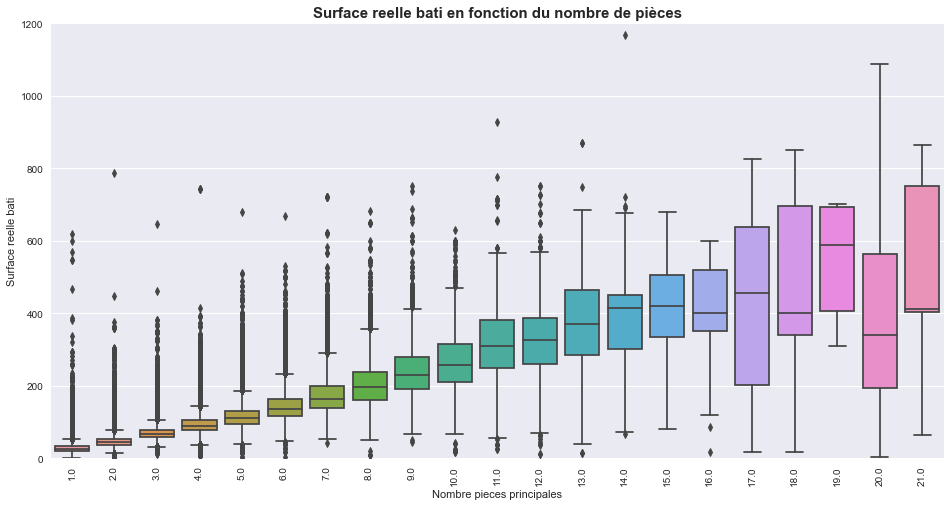

In [24]:
var = 'Nombre pieces principales'
V2021sort_pieces=df[(df['Nombre pieces principales']<22.0 )&(df['Nombre pieces principales']!=0 )]
V2021sort_pieces               
data = pd.concat([V2021sort_pieces['Surface reelle bati'], V2021sort_pieces[var]], axis=1) 
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Surface reelle bati", data=data)
plt.xticks(rotation=90);
fig.axis(ymin=0, ymax=1200);
plt.title('Surface reelle bati en fonction du nombre de pièces',fontsize=15, fontweight= 'bold')

Ce graphique montrant l'évolution de la surface reelle bati en fonction du nombre de pièces suit une belle logique. En effet, plus il y a de pièces et plus la surface reele bati augmente, ce qui est tout à fait logique. Cependant on observe quelques dérèglements à partir de 17 pièces, que l'on peut justifier par des erreurs dans la data. 

### Valeurs foncières en fonction du nombre de pièces en France en 2021

Text(0.5, 1.0, 'Valeurs foncières en fonction du nombre de pièces')

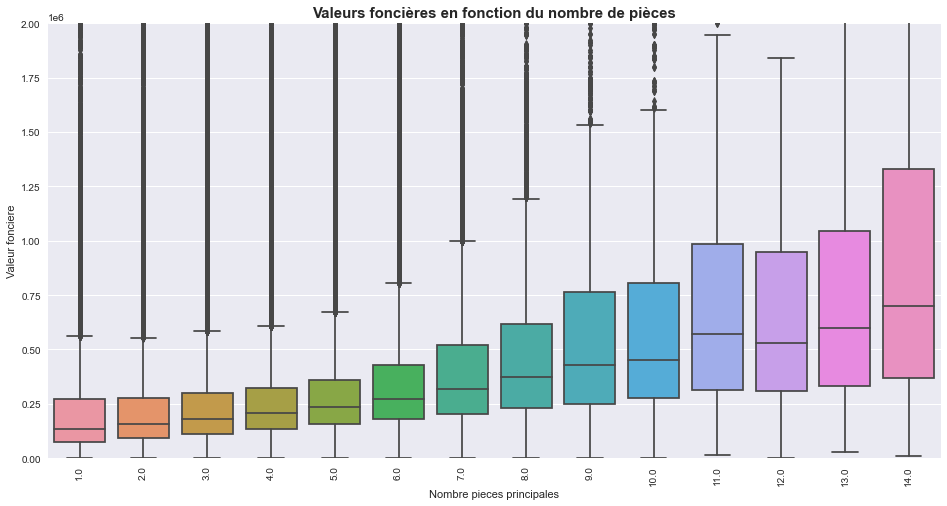

In [25]:
var = 'Nombre pieces principales'
V2021sort_pieces=df[(df['Nombre pieces principales']<15 )&(df['Nombre pieces principales']!=0 )]
V2021sort_pieces             
data = pd.concat([V2021sort_pieces['Valeur fonciere'], V2021sort_pieces[var]], axis=1) 
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Valeur fonciere", data=data)
plt.xticks(rotation=90);
fig.axis(ymin=0, ymax=2000000);
plt.title('Valeurs foncières en fonction du nombre de pièces',fontsize=15, fontweight= 'bold')

Pour ce graphique, on s'arrete au bout de 14 pièces pour éviter d'avoir des valeurs farfelues. Ce graphique montrant l'évolution de la valeur foncière en fonction du nombre de pièces. Tout comme le précédent, plus il y a de pièces et plus la valeur foncière augmente, ce qui est tout à fait logique.

### Prix m2 en fonction du nombre de pièces en France en 2021

Text(0.5, 1.0, 'Prix m2 en fonction du nombre de pièces')

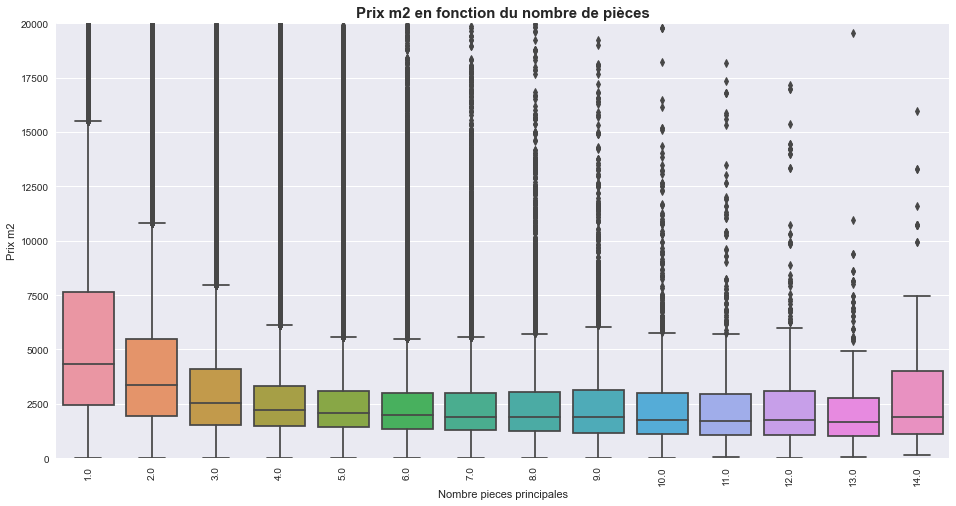

In [26]:
var = 'Nombre pieces principales'
V2021sort_pieces=df[(df['Nombre pieces principales']<15 )&(df['Nombre pieces principales']!=0 )&(df['Prix m2']<20000 )]
V2021sort_pieces               
data = pd.concat([V2021sort_pieces['Prix m2'], V2021sort_pieces[var]], axis=1) 
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='Prix m2', data=data)
plt.xticks(rotation=90);
fig.axis(ymin=0, ymax=20000);
plt.title('Prix m2 en fonction du nombre de pièces',fontsize=15, fontweight= 'bold')

Enfin, ce graphique est assez intéressant. Il montre l'évolution du prix du m2 en fonction du nombre de pièces. Les batiments avec 1, 2, et 3 pièces ont un prix m2 décroissant, mais plus élevé que pour les suivants. Et ce qui est remarquable est qu'entre 4 et 13 pièces, nous avons quasiment les même boxplots, avec les même quartiels et les même médianes. On peut ainsi déduire que pour cet interval, le prix au m2 reste inchangé, ce qui s'explique par le graphique montrant l'évolution de la surface reelle bati en fonction du nombre de pièces. En effet, l'augmentation du nombre de pièce proportionnellement à celui de la surface ainsi que de la valeur fonciere, nous donne au final et prix au m2 équivalent. Augmenter tous les facteurs d'une équation proportionnellement nous donnera toujours le même résultat, comme dans ce graphique. 

## **Etude de cas : Courbevoie**

 ### Affichage données Courbevoie

In [27]:
commune ='COURBEVOIE'
df[(df['Commune']==commune)].sort_values('Valeur fonciere',ascending=False)

,Date mutation,Nature mutation,Valeur fonciere,Commune,Code departement,Code commune,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Prix m2,compteur
3081417,2021-07-29,Vente en l'état futur d'achèvement,147213760.0,COURBEVOIE,92,26,NaN,NaN,NaN,NaN,NaN,1
3081340,2021-07-29,Vente en l'état futur d'achèvement,147213760.0,COURBEVOIE,92,26,NaN,NaN,NaN,NaN,NaN,1
3081349,2021-07-29,Vente en l'état futur d'achèvement,147213760.0,COURBEVOIE,92,26,NaN,NaN,NaN,NaN,NaN,1
3081348,2021-07-29,Vente en l'état futur d'achèvement,147213760.0,COURBEVOIE,92,26,NaN,NaN,NaN,NaN,NaN,1
3081347,2021-07-29,Vente en l'état futur d'achèvement,147213760.0,COURBEVOIE,92,26,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3085214,2021-12-07,Vente,NaN,COURBEVOIE,92,26,NaN,NaN,NaN,NaN,NaN,1
3085215,2021-12-07,Vente,NaN,COURBEVOIE,92,26,NaN,NaN,NaN,NaN,NaN,1
3085216,2021-12-07,Vente,NaN,COURBEVOIE,92,26,NaN,NaN,NaN,NaN,NaN,1
3085217,2021-12-07,Vente,NaN,COURBEVOIE,92,26,NaN,NaN,NaN,NaN,NaN,1


On peut voir sur ce tableau des valeurs à Courbevoie que beaucoup de colonnes ont des valeurs non-renseignée. Nous allons donc dans le tableau suivant nettoyer ces valeurs.

 ### Affichage données nettoyées Courbevoie

In [28]:
dfC = df[(df['Commune']==commune)].dropna()
dfC2 = df20[(df20['Commune']==commune)].dropna()
dfC.sort_values('Valeur fonciere',ascending=False)

,Date mutation,Nature mutation,Valeur fonciere,Commune,Code departement,Code commune,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Prix m2,compteur
3079772,2021-07-20,Vente,41713416.0,COURBEVOIE,92,26,Local industriel. commercial ou assimilé,1500.0,0.0,5029.0,2.780894e+04,1
3079773,2021-07-20,Vente,41713416.0,COURBEVOIE,92,26,Local industriel. commercial ou assimilé,2681.0,0.0,5029.0,1.555890e+04,1
3079774,2021-07-20,Vente,41713416.0,COURBEVOIE,92,26,Local industriel. commercial ou assimilé,2707.0,0.0,5029.0,1.540946e+04,1
3079775,2021-07-20,Vente,41713416.0,COURBEVOIE,92,26,Local industriel. commercial ou assimilé,2681.0,0.0,5029.0,1.555890e+04,1
3079776,2021-07-20,Vente,41713416.0,COURBEVOIE,92,26,Local industriel. commercial ou assimilé,2957.0,0.0,5029.0,1.410667e+04,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3059362,2021-01-29,Vente,231250.0,COURBEVOIE,92,26,Dépendance,0.0,0.0,1599.0,inf,1
3059361,2021-01-29,Vente,231250.0,COURBEVOIE,92,26,Dépendance,0.0,0.0,1599.0,inf,1
3059364,2021-01-29,Vente,231250.0,COURBEVOIE,92,26,Dépendance,0.0,0.0,1599.0,inf,1
3085970,2021-11-30,Vente,175000.0,COURBEVOIE,92,26,Maison,56.0,4.0,140.0,3.125000e+03,1


Ce nouveau tableau nettoyé voit être supprimé les lignes dont au moins une valeur était NaN, sans pour autant filtrer les autres données. 

 ### Nombre de mutations à Courbevoie

In [29]:
df[(df['Commune']==commune)].sum().compteur

3252

In [30]:
df20[(df20['Commune']==commune)].sum().compteur

2685

On peut voir que le nombre de mutation à Courebvoie en 2021 (3252) est suppérieur à 2020 (2685) avec une augmentation d'environ 21%.

 ### Calcul moyenne du prix au m2 Courbevoie

In [31]:
import numpy as np
dfCourbevoieN = dfC.replace([np.inf, -np.inf], 0)
dfCourbevoieN = dfCourbevoieN.replace([np.inf, -np.inf], 0) 
dfCourbevoieN = dfCourbevoieN[(dfCourbevoieN['Prix m2']!=0)]
dfCourbevoieN['Prix m2'].mean()

57282.2044303147

En remplaçant les valeurs infinies du prix au m2 par des zéros, on obtient une moyenne de 57 282 euros au mètre carré. C'est évidemment illogique, mais attendu en regardant les valeurs surprenantes de la valeur foncière avec la superficie. 

 ### Calcul moyennes nettoyées du prix au m2 Courbevoie

In [32]:
dfCourbevoieN = dfC.replace([np.inf, -np.inf], 0) 
dfCourbevoieN = dfCourbevoieN[(dfCourbevoieN['Prix m2']!=0)&(dfCourbevoieN['Prix m2']<30000)]
dfCourbevoieN['Prix m2'].mean()

11256.150607365524

In [33]:
dfCourbevoieN2 = dfC2.replace([np.inf, -np.inf], 0) 
dfCourbevoieN2 = dfCourbevoieN2[(dfCourbevoieN2['Prix m2']!=0)&(dfCourbevoieN2['Prix m2']<30000)]
dfCourbevoieN2['Prix m2'].mean()

10539.063709230762

In [34]:
V2021sort_pieces=df[(df['Prix m2']<20000 )&(df['Code departement']==92)]
meds = V2021sort_pieces['Prix m2'].mean()
meds

7373.888382123031

En ne prenant pas en compte les valeurs trop élevés du prix au m2 > 30 000 euros, on obtient une moyenne à Courbevoie de 11 256 euors en 2021, alors qu'elle était de 10 539 en 2020, soit une augmentation d'environ 6,8%. Cette valeur reste toutefois bien au-dessus de la moyenne régionnale qui est de 7 373 euros. 

 ### Affichage des établissements les plus coûteux à Courbevoie

In [35]:
dfCourbevoieP = dfCourbevoieN.filter(items=['Date mutation','Nature mutation','Type local','Prix m2','Valeur fonciere'])
dfCourbevoieP.sort_values(by=['Prix m2','Valeur fonciere'],ascending=False).head()

,Date mutation,Nature mutation,Type local,Prix m2,Valeur fonciere
3079772,2021-07-20,Vente,Local industriel. commercial ou assimilé,27808.944000,41713416.0
3079777,2021-07-20,Vente,Local industriel. commercial ou assimilé,27808.944000,41713416.0
3061903,2021-03-02,Vente,Appartement,25340.909091,2230000.0
3074259,2021-06-30,Vente,Maison,21875.000000,700000.0
3074258,2021-06-30,Vente,Maison,20000.000000,700000.0


Petit tableau montrant les cinq établissements avec le plus de valeur foncière à Courbevoie. Cela peut être du à la partie dans la Défense de Courbevoie, avec les grosses tours d'entrprises. 

 ### Box plot de la surface réelle bati dans les maisons à Courbevoie

C:\Users\theoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot de la surface réelle bati')

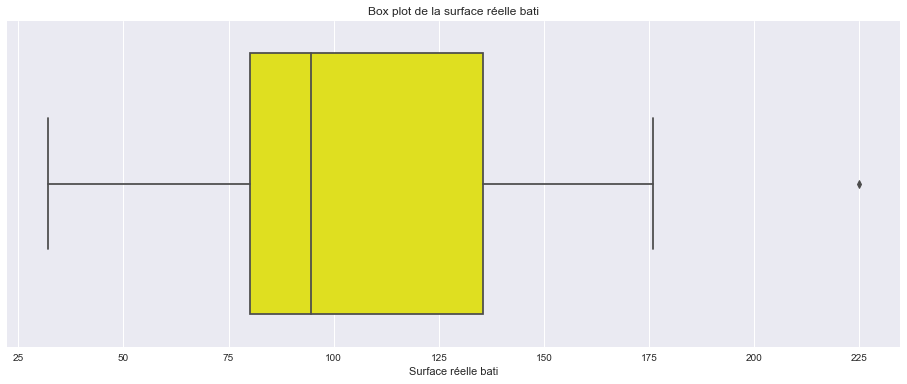

In [36]:
dfBox = dfCourbevoieN[(dfCourbevoieN['Type local']=='Maison' )]
plt.figure(figsize=(16, 6))
sns.boxplot(dfBox['Surface reelle bati'],color='yellow')
plt.xlabel('Surface réelle bati')
plt.title("Box plot de la surface réelle bati")

Dans la ville de Courbevoie, les maisons vont de 25m^2 à 175m^2, mais la très grande majorité est regroupé autour de 85m^2, qui est la médiane. On note une seule valeur extrême.

 ### Box plot de la surface réelle bati dans les appartements à Courbevoie

C:\Users\theoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot de la surface réelle bati')

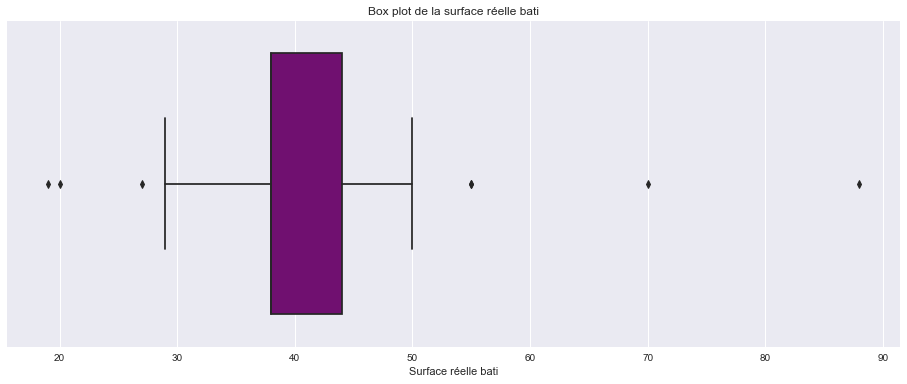

In [37]:
dfBox = dfC[(dfC['Type local']=='Appartement' )]
plt.figure(figsize=(16, 6))
sns.boxplot(dfBox['Surface reelle bati'],color='purple')
plt.xlabel('Surface réelle bati')
plt.title("Box plot de la surface réelle bati")

Dans la ville de Courbevoie, les appartements vont de 28m^2 à 50m^2, mais la très grande majorité est regroupé autour de 40m^2, qui est la médiane. On note environ six valeurs extrêmes.

 ### Box plot du Prix m2 à Courbevoie

C:\Users\theoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot du Prix m2')

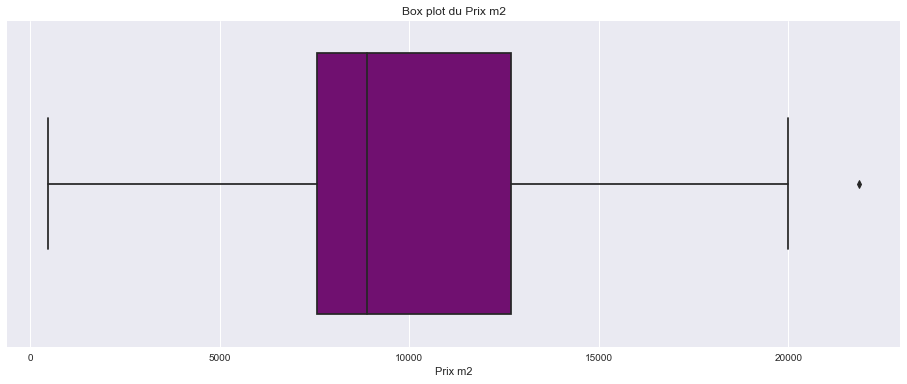

In [38]:
dfBox = dfCourbevoieN[(dfCourbevoieN['Prix m2']<25000)]
plt.figure(figsize=(16, 6))
sns.boxplot(dfBox['Prix m2'],color='purple')
plt.xlabel('Prix m2')
plt.title("Box plot du Prix m2")

Dans la ville de Courbevoie, les établissement vont de 100 à 20 000 euros/m^2, mais la très grande majorité est regroupé autour de 8 000 euros/m^2, qui est la médiane. On note environ une valeur extrême.

### Box plot du Prix m2 à ASNIERES-SUR-SEINE

C:\Users\theoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot du Prix m2')

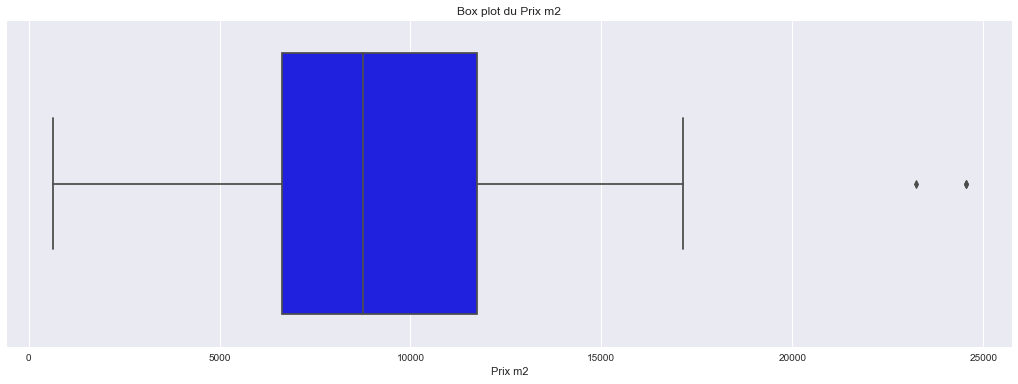

In [39]:
dfCAS = df[(df['Commune']=='ASNIERES-SUR-SEINE')].dropna()
dfBox2 = dfCAS[(dfCAS['Prix m2']<25000)]
plt.figure(figsize=(18, 6))
sns.boxplot(dfBox2['Prix m2'],color='blue')
plt.xlabel('Prix m2')
plt.title("Box plot du Prix m2")

Dans la ville d'Asnières-sur-seine, les établissement vont de 100 à 17 000 euros/m^2, mais la très grande majorité est regroupé autour de 8 000 euros/m^2, qui est la médiane. On note environ deux valeurs extrêmes.

Ces deux boxplot nous montre que malgrés la différence des quartiles et valeurs max entres ces deux villes, la médiane peut tout de même être la même.

 ### Comparaison des prix au m2 par commune du 92

Text(0.5, 1.0, 'Prix m2')

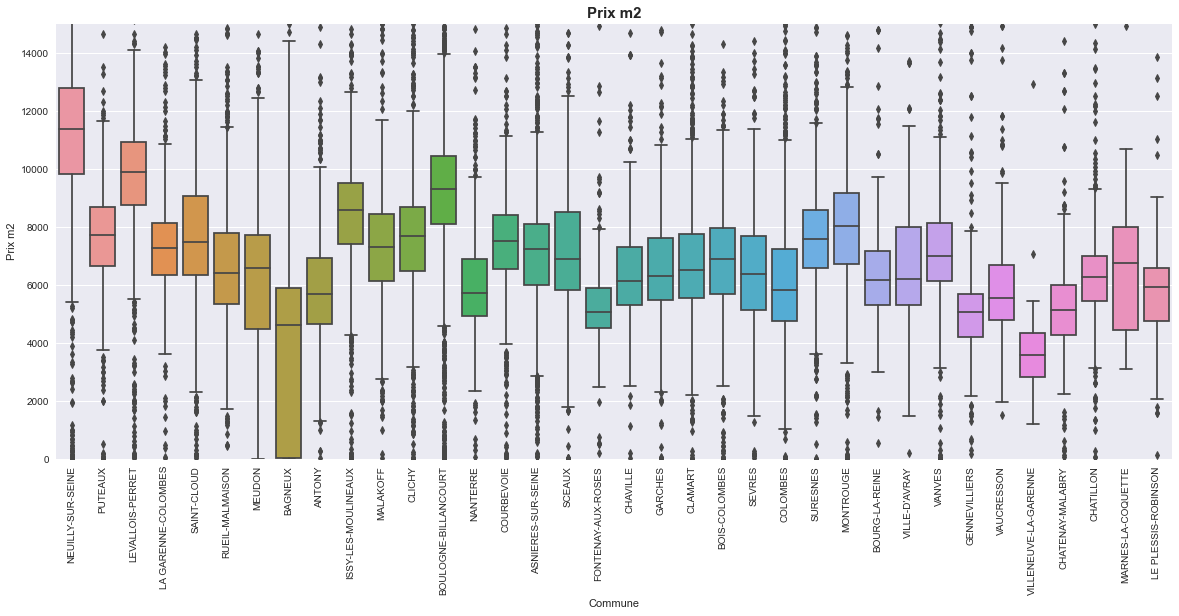

In [40]:
var = 'Commune'
V2021sort_pieces=df[(df['Prix m2']<20000 )&(df['Code departement']==92)]
V2021sort_pieces=V2021sort_pieces.sort_values(by='Prix m2',ascending=False)     
data = pd.concat([V2021sort_pieces['Prix m2'], V2021sort_pieces[var]], axis=1) 
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="Prix m2", data=data)
plt.xticks(rotation=90);
fig.axis(ymin=0, ymax=15000);
plt.title('Prix m2',fontsize=15, fontweight= 'bold')

Ce graphique de boxplot nous montre que Courbevoie semble être au milieu des villes du 92 sur le plan Prix du m2; et c'est une des villes avec le moins d'écart type du département. 

## **CONCLUSION**

Au fil des analyses, on ne peut que constater l'impact significatif de la crise sanitaire sur 2020 sur les demandes de valeurs foncières et sur pratiquement tous les parametres que nous avons analysés, et à toutes les échelles. Cela peut se voir selon les chiffres de l'année 2021, qui sont bien plus stables.

Une chose intéressante que nous aurions pu faire est d'utiliser les chiffres de l'année 2019. En effet, comparer des chiffres en plein début de covid, avec ceux de 2020 aurait pu être surprenant. Nous avons cependant essayé de charger les données d’autres années mais celles-ci sont si volumineuses que nous atteignons rapidement la limite en mémoire ram de nos machines ce qui fait crasher le notebook.

Pour conclure, nous avons apprécié faire ce travail et nous avons trouvé interessant d'appliquer nos connaissances sur un sujet courant afin de d'y etablir des statistiques pertinentes qui nourrissent notre culture générale, et d'y mesurer et visualiser l'impact de l'actualité.